## Solving k-Nearest Neighbors with Math<br>

__k-Nearest Neighbors is a very commonly used algorithm for classification, regression and for imputing missing values__. It works great when you have large amount of classes and a few samples per class.<br>
<br>
__kNN in one sentence__: is an algorithm that classifies or calculates a regression based on the items in the training set that are 'closer' to each of the testing points.<br>
<br>
k Parameter - Size of Neighborhood<br>
 - k represents the amount of neighbors to compare data with. That is why it usually k is an odd number.<br>
 - the bigger the k, the less 'defined' or more smooth are the neighborhoods.<br>
<br>

__Distance__ is a key factor in order to determine who is the closest. Distance impacts the size and characteristics of the neighborhoods.  The most commonly used is Euclidean distance since it gives the closest distance between 2 points.<br>
<br>
Most Common Distances<br>
 - Euclidean: the shortest distance between to points that might not be the best option when features are normalized. Typically used in face recognition.<br>
 - Taxicab or Manhattan: is the sum of the absolute differences of the Cartesian coordinates of 2 points. It works the same way as when a car needs to move around 'blocks' to get to the destination.<br>
 - Minkowski: is a mix of both Euclidean and Manhattan.<br>

<br>
The amount of features impacts kNN significantly because the more points we have, the more 'unique' each neighborhood becomes. It also affects speed because we need to measure each distance first in order to determine who are the closest k neighbors.<br)

### The kNN Algorithm<br>

__1- Divide dataset in training/testing sets.__ Dataset has to be divided in 2, usually 80-20 or 70-30%. Each dataset has to be divided in features (x) and labels (y).<br>
__2- Create a matrix with all the distances.__ The size of the matrix is i*j where i=rows in training set and j=rows in testing set.<br>
__3- Sort the matrix by columns.__ By sorting each column we can determine which points (rows in the training set) are closer to the testing set points (represented in columns).<br>
__4- Get the indices of the top k neighbors.__ Find the points in the training set that are closer to the testing set points.<br>
__5- Get the label that repeats the most in the top k neighbors.__ Mathematically is the mode of the labels of the top k neighbors.<br>
__6- Create a new array with the projected label of the testing set.__ The size of the array is the same size as the y of the testing set.<br>
__7- Calculate accuracy of the projected labels.__ Evaluate the differences between the projected label of y in the testing set with the actual y of the testing set. If accuracy is low, we can change it by modifying k.<br>
__8- Implement algorithm.__ Model is ready to be deployed. <br>

### The following example can be used to solve 'any' type of kNN problem without sklearn, specially if you want to change some source code to adapt it to your particular needs.<br>

I am going to be using the 'famous' Iris Flower Dataset that you can download anywhere. If you don't know this dataset you can get more information here: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#Loading File
df = pd.read_csv('iris.data',header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Use Train-Test-Split to make training and testing datasets/arrays
xTrain, xTest = train_test_split(df, test_size=0.3)
yTrain = np.array(xTrain.iloc[:,4])
xTrain = np.array(xTrain.iloc[:,0:4])
yTest = np.array(xTest.iloc[:,4])
xTest = np.array(xTest.iloc[:,0:4])

#Characteristics of the arrays
print('Dataset Shapes:')
print('xTrain -->', xTrain.shape)
print('yTrain -->', yTrain.shape)
print('xTest -->', xTest.shape)
print('yTest -->', yTest.shape)
print('\nxTrain: Top rows\n',xTrain[0:5,:])
print('\nyTrain: Top rows\n',yTrain[0:5])

Dataset Shapes:
xTrain --> (105, 4)
yTrain --> (105,)
xTest --> (45, 4)
yTest --> (45,)

xTrain: Top rows
 [[6.  3.4 4.5 1.6]
 [6.3 2.9 5.6 1.8]
 [6.  3.  4.8 1.8]
 [5.7 2.8 4.5 1.3]
 [7.7 3.  6.1 2.3]]

yTrain: Top rows
 ['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']


#### Distances
Euclidean distance is calculated same way as when calculating the hypotenuse in a triangle. Euclidean distance follows the Pythagorean theorem. We have coordinateS p=(p1,p2) and q=(q1,q2), so the Euclidean distance is the square root of the difference of each point elevated to the square:<br>

__In its general form:__<br>
ED = SQRT((qi-pi)^2)<br>
<br>
__In its matrix form:__<br>
ED = SQRT((qi-pi) . transpose(qi-pi))<br>

The dot product of (qi-pi) and (qi-pi) transposed is the matrix equivalent of a function elevated to the square.<br>

__With all terms:__<br>
pi.T(pi) + qi.T(qi) - 2(qi.T(pi) <br>

Summary: we will be create 1 matrix for the first term, another matrix for the 2nd term and a 3rd matrix with the final term and then add the first 2 and substract 2 times the 3rd matrix.

In [4]:
#Importing knn.py functions
#the knn.py file has to be in the same directory than the file
from knn import knn_predictions
from knn import knn_accuracy

In [5]:
#The knn_predictions function will call knn_distances and bring back prediction based
# on the distance and the size of k.
predictions = knn_predictions(xTrain, yTrain, xTest,3)
print('Size of Predictions Array:\n', predictions.shape)
#print('\nPredictions Array:\n',knn_predictions(xTrain,yTrain,xTest,3))

Size of Predictions Array:
 (45,)


Now that we have the predicted array, we need to calculate its accuracy:

In [6]:
#Will call knn_accuracy, which was imported from knn.py file
print('Accuracy:',knn_accuracy(predictions,yTest),'%')

Accuracy: 95.56 %


### Validating Solution and the Best k-Value

In [7]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt 

In [8]:
#will first check which is the best k
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    #neigh = KNeighborsClassifier(n_neighbors = n).fit(xTrain,yTrain)
    #yhat=neigh.predict(xTest)
    yhat = knn_predictions(xTrain,yTrain,xTest,n)
    mean_acc[n-1] = metrics.accuracy_score(yTest, yhat)
    std_acc[n-1] = np.std(yhat==yTest)/np.sqrt(yhat.shape[0])

print( "The best accuracy was:", np.round(mean_acc.max()*100,2), "% with k=", mean_acc.argmax()+1) 

The best accuracy was: 97.78 % with k= 7


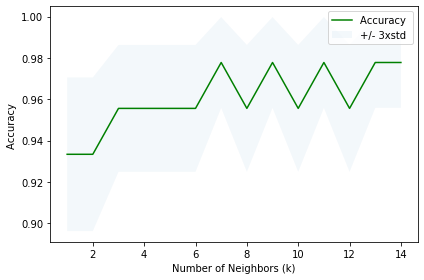

In [9]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.05)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

### Summary and Conclusions
 - knn works really well when a few features can really differentiate each neighborhood. Too many features, specially the ones that add noise, make kNN to have poor results and will slow down the calculations. 
 - You can use this math model to generate and evaluate any knn model.
 - Works great when you have large amount of classes and a few samples per class.